# Analysis of US storm data from 1851 -2020 

### DATA SOURCE:US Hurricane Data: 1851-2020
    Our source for “Continental United States Hurricane Impacts/Landfalls” data is this NOAA webpage.

In [1]:
import pandas as pd                      #import the important libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [2]:
df1=pd.read_excel('stormdata.xlsx')

In [3]:
df1.head(5)

,Year,Month,States Affected and Category by States,U.S. Category,Central Pressure,Max Wind,Name
0,1850s,NaN,NaN,NaN,NaN,NaN,NaN
1,1851,Jun,"TX, C1",1.0,974.0,80,-----
2,1851,Aug,"FL, NW3; I-GA, 1",3.0,955.0,100,"""Great Middle Florida"""
3,1852,Aug,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100,"""Great Mobile"""
4,1852,Sep,"FL, SW1",1.0,982.0,70,-----


# DATA FILTERING

In [4]:
df1.columns =['Year', 'Month', 'States', 'Category', 
             'Pressure', 'Max Wind', 'Name']  

#### month column has some rows which are formatted as Sp-Oc and Jl-Au which needs to be formatted similar to all the rows in the column

In [5]:
df1.loc[df1['Month']=='Sp-Oc']

,Year,Month,States,Category,Pressure,Max Wind,Name
172,1929,Sp-Oc,"FL, SE3, SW2, NW1",3.0,948.0,100,-----


In [6]:
df1.loc[df1['Month']=='Jl-Au']

,Year,Month,States,Category,Pressure,Max Wind,Name
178,1933,Jl-Au,"# TX, S1; FL, SE1",1.0,975.0,80,-----


In [7]:
df1 = df1.replace('Sp-Oc','Sep')   #Replacing the column string
df1 = df1.replace('Jl-Au','Jul')

In [8]:
df1.iloc[178,1]  # verifying 

'Jul'

### Dataframe has irregularities such as there are irrelevant rows with year as 1850s which need to be eliminated

#### using condition to filter the dataframe

In [9]:
df1=df1[df1['Year'].str.contains("s")!=True]

In [10]:
df1.head(6)

,Year,Month,States,Category,Pressure,Max Wind,Name
1,1851,Jun,"TX, C1",1.0,974.0,80,-----
2,1851,Aug,"FL, NW3; I-GA, 1",3.0,955.0,100,"""Great Middle Florida"""
3,1852,Aug,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100,"""Great Mobile"""
4,1852,Sep,"FL, SW1",1.0,982.0,70,-----
5,1852,Oct,"FL, NW2; I-GA, 1",2.0,965.0,90,"""Middle Florida"""
6,1853,Oct,"* GA, 1",1.0,965.0,70,-----


# Filtering the NULL values

In [11]:
df1=df1[df1.Month.str.contains("None")!=True]

In [12]:
df1["Month"] = pd.to_datetime(df1.Month, format='%b').dt.month

In [13]:
df1.head()

,Year,Month,States,Category,Pressure,Max Wind,Name
1,1851,6.0,"TX, C1",1.0,974.0,80,-----
2,1851,8.0,"FL, NW3; I-GA, 1",3.0,955.0,100,"""Great Middle Florida"""
3,1852,8.0,"AL, 3; MS, 3; LA, 2; FL, SW2, NW1",3.0,961.0,100,"""Great Mobile"""
4,1852,9.0,"FL, SW1",1.0,982.0,70,-----
5,1852,10.0,"FL, NW2; I-GA, 1",2.0,965.0,90,"""Middle Florida"""


In [14]:
df1=df1[df1['Year'].notnull()]

In [15]:
df1 = df1.astype({'Year': 'int'})

In [16]:
df1 = df1.replace('-----',np.NaN)

In [17]:
df1 = df1.astype({'Max Wind': 'float'})

In [18]:
df1 = df1.astype({'Month': 'int'}) #Converting month column datatype

In [19]:
df1['Category'].value_counts()

1.0    124
2.0     85
3.0     62
4.0     26
5.0      4
Name: Category, dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>]], dtype=object)

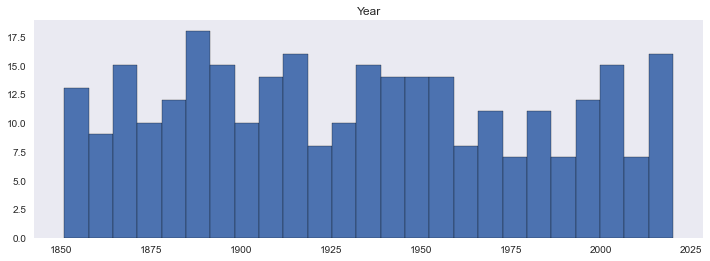

In [20]:
plt.style.use("seaborn")
df1.hist(column='Year', bins=25,ec='black',figsize=(12,4), grid=False)

### From this histogram, it’s obvious that there’s been no noticeable change in storm frequency over time

### So we need to categorize it:

In [21]:
df_category = df1[['Year','Category']]
df_wind = df1[['Year','Max Wind']]
df_pressure = df1[['Year','Pressure']]

## we can break out the data by category (1-5) to find out the severity of the storm. 

In [22]:
 print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## This for loop will iterate through the numbers 1-6 and will use each of those numbers in turn to search for hurricanes of that category.

### Rows whose category matches the number will be written to a new (temporary) dataframe called df2 which will, in turn, be used to plot a histogram. The plt.title line applies a title for the printed graph that will include the category number

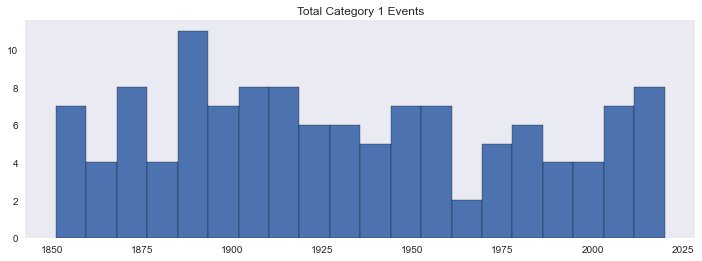

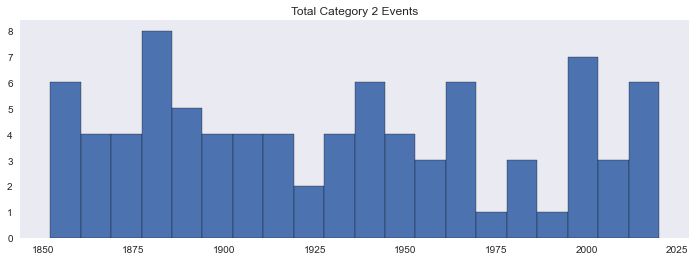

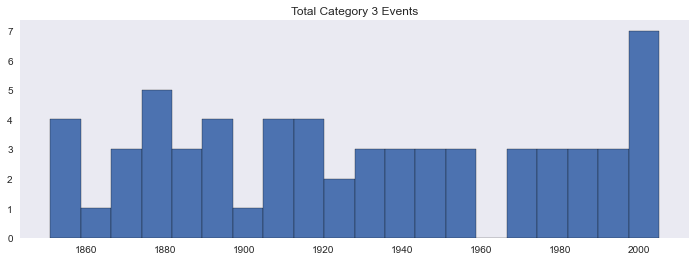

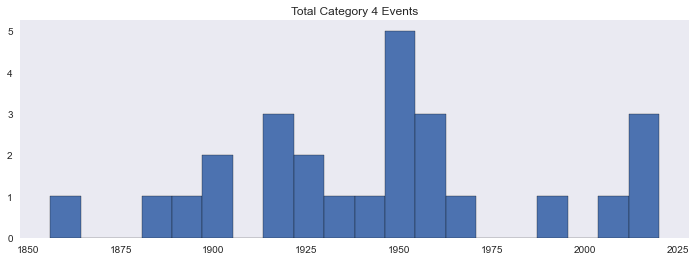

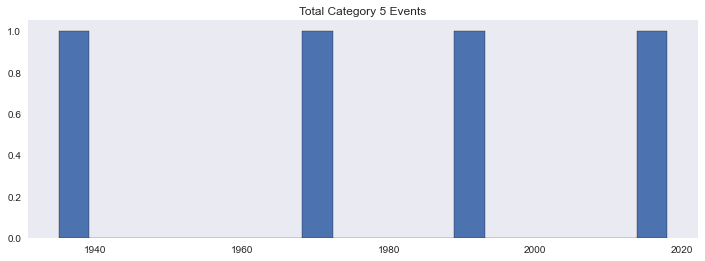

In [23]:
for x in range(1, 6):
    cat_num = x
    converted_num = str(cat_num) 
    dfcat = df_category['Category']==(x)
    df2 = df_category[dfcat]
    df2.hist(column='Year', bins=20,ec='black',grid=False,figsize=(12,4))
    plt.title("Total Category " + (converted_num) + " Events")

In [24]:
df1['Category'].value_counts()

1.0    124
2.0     85
3.0     62
4.0     26
5.0      4
Name: Category, dtype: int64

# US hurricane time series analysis

### Here I need to categorize the time occurence of storm (yearly) with the maximum speed of the storm that had occured 

In [2]:
df = pd.read_excel('hurricane.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Storm #         396 non-null    object 
 1   Date            380 non-null    object 
 2   Time            362 non-null    object 
 3   Lat             362 non-null    object 
 4   Lon             362 non-null    object 
 5   Max Winds       362 non-null    float64
 6   Landfall State  362 non-null    object 
 7   Storm Name      145 non-null    object 
dtypes: float64(1), object(7)
memory usage: 24.9+ KB


In [4]:
df.sample(20)

,Storm #,Date,Time,Lat,Lon,Max Winds,Landfall State,Storm Name
188,2,1930-09-09 00:00:00,0900Z,27.5,82.7,40.0,FL,NaN
253,1,1953-06-06 00:00:00,1700Z,30.3,85.9,40.0,FL,Alice
156,2,7/15/1912,1500Z,31.3,81.3,45.0,GA,NaN
384,2,6/16/2015,1645Z,28.2,96.7,50.0,TX,Bill
120,3,8/13/1899*,1200Z,27,78.6,60.0,FL,NaN
101,1,8/15/1895,1900Z,29.3,89.6,50.0,LA,NaN
307,3,8/20/1991,0130Z,44.1,69.1,60.0,MA,Bob
281,6,09/14/1961,2100Z,37.1N,76.0W,45.0,VA,Unnamed
346,2,2004-12-08 00:00:00,1400Z,29.6,85.1,40.0,FL,Bonnie
171,5,9/30/1920,0900Z,28.9,82.9,55.0,FL,NaN


# Data Cleaning
##### As the data contains irregularities it needs to be cleaned 

##### finding and cleaning null or missing values, impute the values if removing them affect analysis

In [5]:
df=df[(df.Date.str.contains("None")) == False]

In [6]:
df[df['Date'].str.contains("#")]

,Storm #,Date,Time,Lat,Lon,Max Winds,Landfall State,Storm Name
42,4,9/ 4/1874$#,1200Z,25,97.6,40.0,TX,NaN
153,2,8/21/1910#,0000Z,25.7,97.2,40.0,TX,NaN
178,3,9/7/1925#,0000Z,25.1,97.3,35.0,TX,NaN
207,14,9/13/1936#,1600Z,25.9,97.1,45.0,TX,NaN
236,1,8/2/1947#,0000Z,25.6,97.3,45.0,TX,NaN
257,3,6/25/1954#,1400Z,25,97.6,60.0,TX,Alice
344,8,8/16/2003#,0600Z,25.6,96.2,35.0,TX,Erika
352,5,7/20/2005#,1200Z,24.8,97.6,45.0,TX,Emily
372,1,7/1/2010#,0000Z,24.3,97.3,40.0,TX,Alex
375,10,9/7/2010#,0600Z,26.2,97.7,50.0,TX,Hermine


In [7]:
df[df['Date'].str.contains("&")]

,Storm #,Date,Time,Lat,Lon,Max Winds,Landfall State,Storm Name
81,6,9/26/1888&,1300Z,41.6,69.9,55.0,MA,NaN
107,2,9/10/1897$&,1800Z,24.4,81.9,50.0,FL,NaN
109,3,9/23/1897&,1000Z,35.2,75.7,50.0,NC,NaN
145,2,5/29/1908&,2100Z,35.2,75.6,55.0,NC,NaN
230,1,6/26/1945&,0100Z,34.7,76.6,60.0,NC,NaN
294,10,06/03/1963&,0800Z,35.2N,75.8W,40.0,NC,Unnamed


### Replacing the special characters with space to get the  date column in correct format 

In [8]:
df['Date'] = df.Date.str.replace('$', '')
df['Date'] = df.Date.str.replace('*', '')
df['Date'] = df.Date.str.replace('#', '')
df['Date'] = df.Date.str.replace('%', '')
df['Date'] = df.Date.str.replace('&', '')

<ipython-input-8-829342916f6d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Date'] = df.Date.str.replace('$', '')
<ipython-input-8-829342916f6d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Date'] = df.Date.str.replace('*', '')


In [35]:
df.columns =['Storm', 'Date', 'Time', 'Lat', 'Lon', 
             'MaxWinds', 'LandfallState', 'StormName'] 

In [36]:
df.sample(12)

,Storm,Date,Time,Lat,Lon,MaxWinds,LandfallState,StormName
56,6,1880-09-08,1600Z,29.8,83.6,50.0,FL,NaN
145,2,1908-05-29,2100Z,35.2,75.6,55.0,NC,NaN
70,6,1885-09-26,0400Z,29.6,89,60.0,LA,NaN
113,6,1897-10-25,2300Z,36.1,75.8,55.0,NC,NaN
160,1,1916-05-14,0600Z,25.1,81,35.0,FL,NaN
176,7,1923-10-19,0900Z,41.3,70.6,50.0,MA,NaN
170,3,1920-09-23,0600Z,33.7,78.2,55.0,NC,NaN
60,2,1881-08-13,2100Z,28,96.9,40.0,TX,NaN
247,4,1950-09-11,0600Z,34.9,72.2,40.0,NC,Dog
279,3,1960-07-29,2100Z,33.9,78.2,60.0,NC,Brenda


In [11]:
df.dtypes

Storm#            object
Date              object
Time              object
Lat               object
Lon               object
MaxWinds         float64
LandfallState     object
StormName         object
dtype: object

## Converting the date column into datetime type using to_datetime 

In [12]:
df.Date = pd.to_datetime(df.Date)

In [79]:
df3 = df[['Date','MaxWinds']]

# Plotting the distribution of occurence of storm over the years

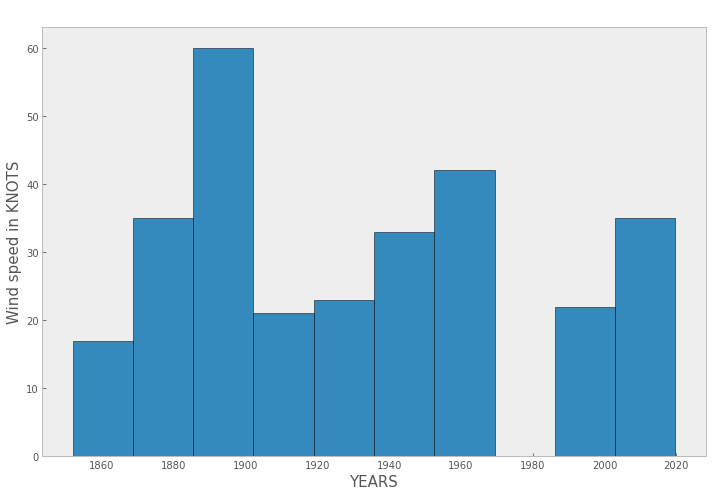

In [80]:
df3['Date'].hist(ec='black',figsize=(10,7),grid=False)
plt.xlabel('YEARS',size=15)
plt.ylabel('Wind speed in KNOTS',size=15)
plt.title('Distribution of occurence of Storm Over the years',size=20)
plt.tight_layout()

In [74]:
df1

,Date,MaxWinds
1,1851-10-19,50.0
6,1856-08-19,50.0
7,1857-09-30,50.0
8,1858-09-14,60.0
9,1858-09-16,50.0
...,...,...
389,2017-08-30,40.0
390,2017-09-22,40.0
391,2017-09-27,45.0
392,2018-05-28,40.0


### Creating dataframe for each wind speed

In [22]:
df_30 = df1[df1['MaxWinds'].between(30, 39)]
df_40 = df1[df1['MaxWinds'].between(40, 49)]
df_50 = df1[df1['MaxWinds'].between(50, 59)]
df_60 = df1[df1['MaxWinds'].between(60, 79)]

### Calculating Number of storms at respective wind speed

In [23]:
st1 = len(df_30.index)
print('The number of storms between 30 and 39: ', st1)
st2 = len(df_40.index)
print('The number of storms between 40 and 49: ', st2)
st3 = len(df_50.index)
print('The number of storms between 50 and 59: ', st3)
st4 = len(df_60.index)
print('The number of storms between 60 and 79: ', st4)

The number of storms between 30 and 39:  38
The number of storms between 40 and 49:  86
The number of storms between 50 and 59:  115
The number of storms between 60 and 79:  49


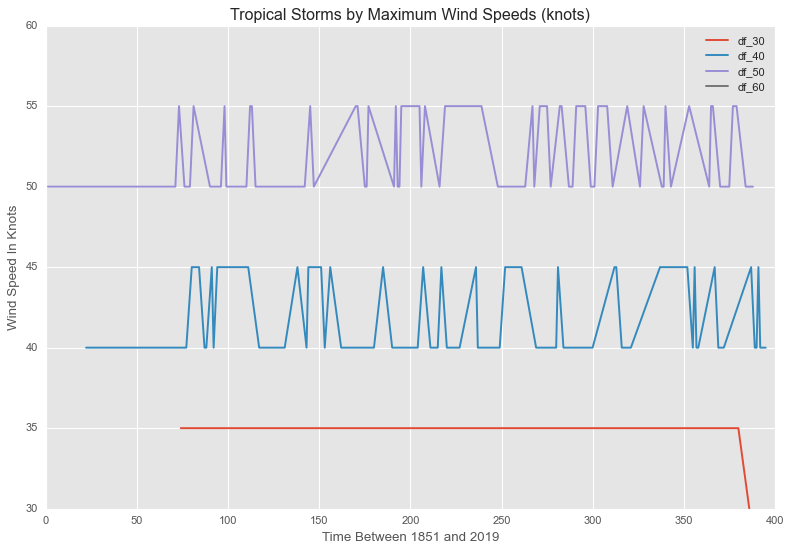

In [118]:
fig = plt.figure()
ax = plt.subplot(111)
df_30['MaxWinds'].plot(ax=ax, label='df_30',figsize=(10,7))
df_40['MaxWinds'].plot(ax=ax, label='df_40',figsize=(10,7))
df_50['MaxWinds'].plot(ax=ax, label='df_50',figsize=(10,7))
df_60['MaxWinds'].plot(ax=ax, label='df_60',figsize=(10,7))
ax.set_ylabel('Wind Speed In Knots')
ax.set_xlabel('Time Between 1851 and 2019')
plt.title('Tropical Storms by Maximum Wind Speeds (knots)')
ax.legend()
plt.tight_layout()

# Plotting seprate histogram for every wind speed for further understanding.

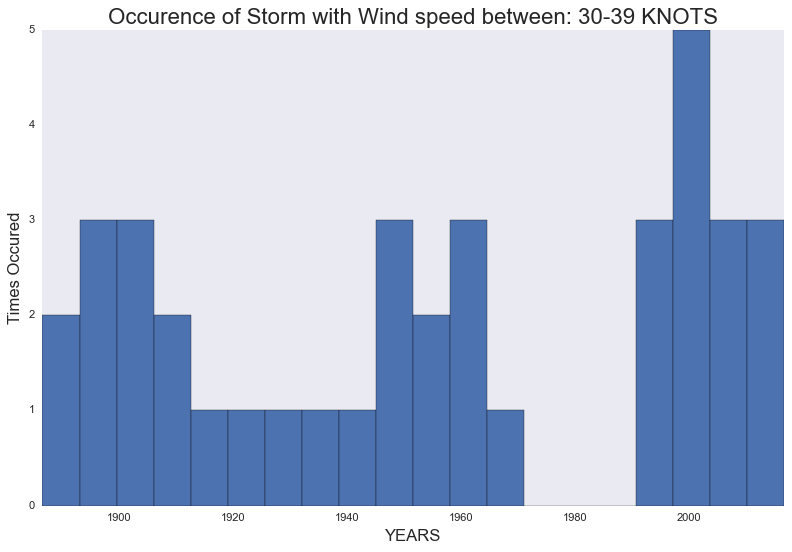

In [120]:
df_30['Date'].hist(bins=20,ec='black',figsize=(10,7),grid=False)
plt.xlabel('YEARS',size=15)
plt.ylabel('Times Occured',size=15)
plt.style.use('seaborn')
plt.title('Occurence of Storm with Wind speed between: 30-39 KNOTS',size=20)
plt.tight_layout()

<AxesSubplot:xlabel='MaxWinds', ylabel='count'>

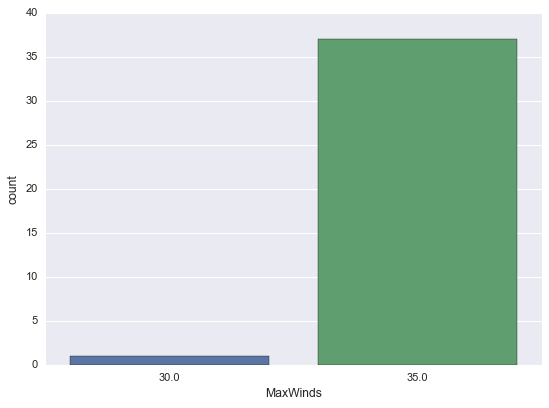

In [108]:
sns.countplot(x='MaxWinds', data=df_30)

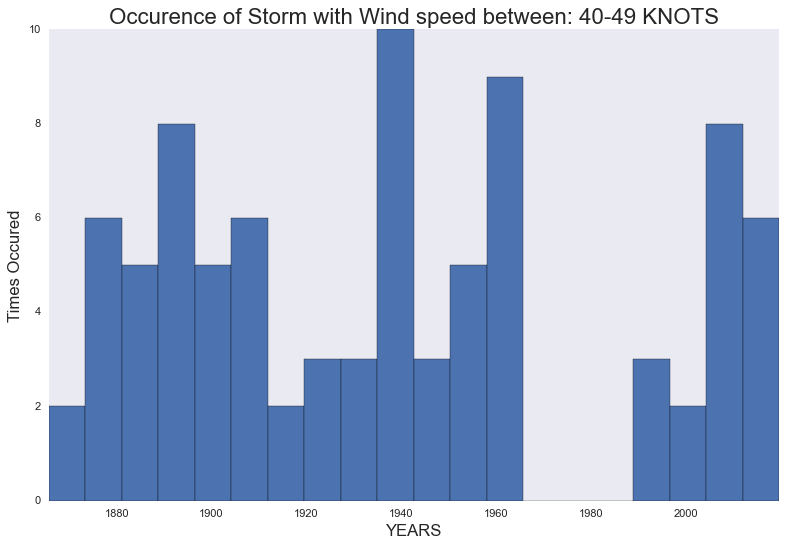

In [109]:
df_40['Date'].hist(bins=20,ec='black',figsize=(10,7),grid=False)
plt.xlabel('YEARS',size=15)
plt.ylabel('Times Occured',size=15)
plt.title('Occurence of Storm with Wind speed between: 40-49 KNOTS',size=20)
plt.tight_layout()

<AxesSubplot:xlabel='MaxWinds', ylabel='count'>

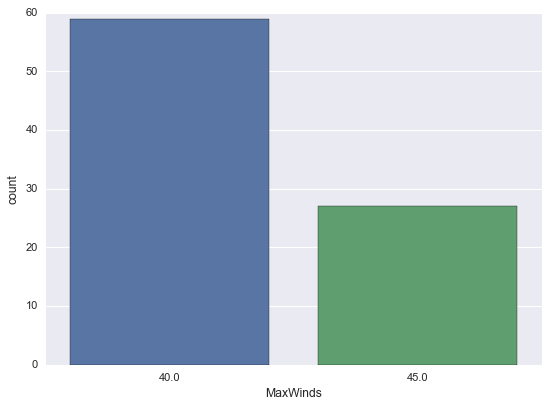

In [110]:
sns.countplot(x='MaxWinds', data=df_40)

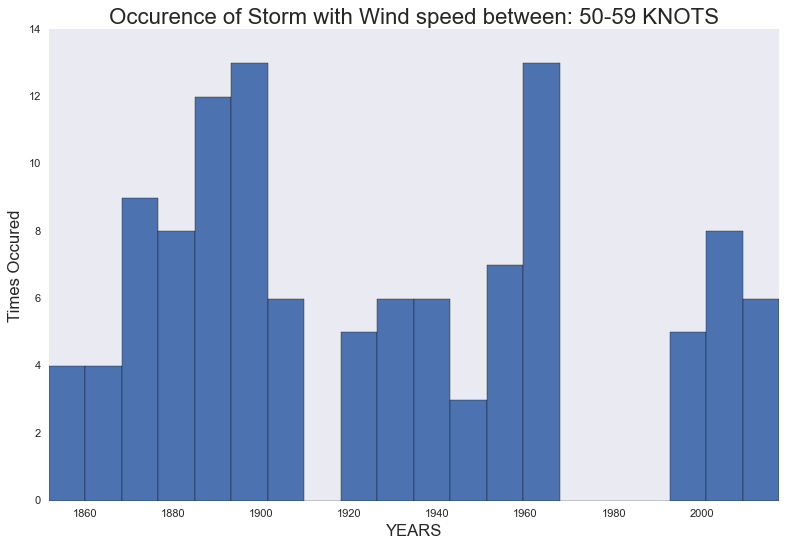

In [111]:
df_50['Date'].hist(bins=20,ec='black',figsize=(10,7),grid=False)
plt.xlabel('YEARS',size=15)
plt.ylabel('Times Occured',size=15)
plt.title('Occurence of Storm with Wind speed between: 50-59 KNOTS',size=20)
plt.tight_layout()

<AxesSubplot:xlabel='MaxWinds', ylabel='count'>

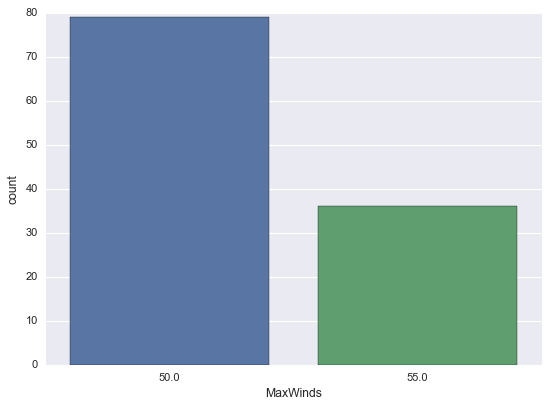

In [112]:
sns.countplot(x='MaxWinds', data=df_50)

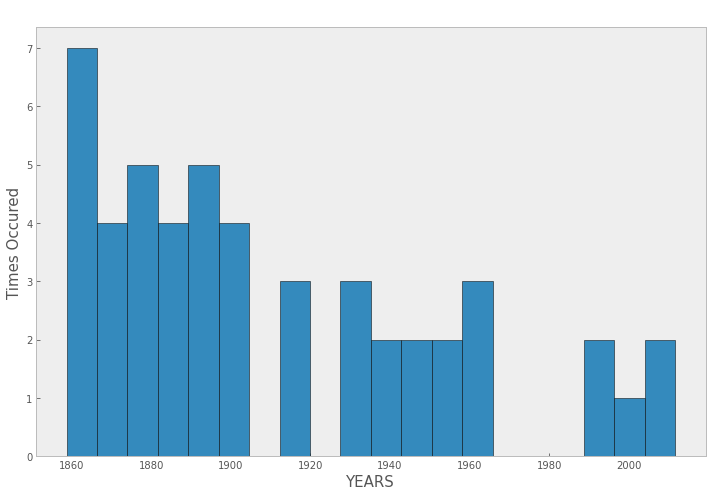

In [73]:
df_60['Date'].hist(bins=20,ec='black',figsize=(10,7),grid=False)
plt.xlabel('YEARS',size=15)
plt.ylabel('Times Occured',size=15)
plt.title('Occurence of Storm with Wind speed between: 60-69 KNOTS',size=20)
plt.tight_layout()

<AxesSubplot:xlabel='MaxWinds', ylabel='count'>

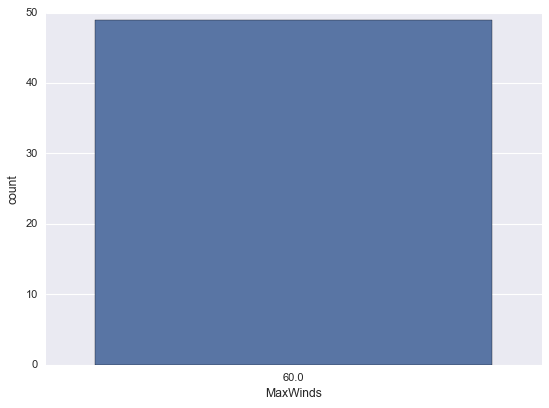

In [113]:
sns.countplot(x='MaxWinds', data=df_60)